In [157]:
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
dataset_dataframe = pd.read_csv(r'C:\Users\user\Documents\machine-learning\week 1\latihan week 1\Week1_Daftar_Saham.csv')

In [159]:
dataset_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                829 non-null    object 
 1   Name                829 non-null    object 
 2   ListingDate         829 non-null    object 
 3   Shares              829 non-null    float64
 4   ListingBoard        829 non-null    object 
 5   Sector              829 non-null    object 
 6   LastPrice           824 non-null    float64
 7   MarketCap           824 non-null    float64
 8   MinutesFirstAdded   787 non-null    object 
 9   MinutesLastUpdated  787 non-null    object 
 10  HourlyFirstAdded    806 non-null    object 
 11  HourlyLastUpdated   806 non-null    object 
 12  DailyFirstAdded     824 non-null    object 
 13  DailyLastUpdated    824 non-null    object 
dtypes: float64(3), object(11)
memory usage: 90.8+ KB


In [160]:
# dataset_dataframe.isnull() untuk mendeteksi nilai 'null' pada dataframe

dataset_dataframe.isnull().sum()

Code                   0
Name                   0
ListingDate            0
Shares                 0
ListingBoard           0
Sector                 0
LastPrice              5
MarketCap              5
MinutesFirstAdded     42
MinutesLastUpdated    42
HourlyFirstAdded      23
HourlyLastUpdated     23
DailyFirstAdded        5
DailyLastUpdated       5
dtype: int64

In [161]:
# dalam bentuk persen
dataset_dataframe.isnull().sum() / len(dataset_dataframe) * 100

Code                  0.000000
Name                  0.000000
ListingDate           0.000000
Shares                0.000000
ListingBoard          0.000000
Sector                0.000000
LastPrice             0.603136
MarketCap             0.603136
MinutesFirstAdded     5.066345
MinutesLastUpdated    5.066345
HourlyFirstAdded      2.774427
HourlyLastUpdated     2.774427
DailyFirstAdded       0.603136
DailyLastUpdated      0.603136
dtype: float64

#### Identifikasi nilai yang hilang/missing value dan penanganannya

In [162]:
dataset_dataframe['LastPrice'] = dataset_dataframe['LastPrice'].fillna(dataset_dataframe['LastPrice'].mean())

In [163]:
dataset_dataframe['MarketCap'] = dataset_dataframe['MarketCap'].fillna(dataset_dataframe['MarketCap'].mean())

In [164]:
# cara handle missing value tipedata datetime
dataset_dataframe['MinutesFirstAdded'] = dataset_dataframe['MinutesFirstAdded'].ffill() # ffill berfungsi untuk mengisi nilai null menggunakan nilai sebelumnya
dataset_dataframe['MinutesLastUpdated'] = dataset_dataframe['MinutesLastUpdated'].bfill() # bfill berfungsi mengisi nilai null dengan nilai sesudahnya

In [165]:
dataset_dataframe['HourlyFirstAdded'] = dataset_dataframe['HourlyFirstAdded'].ffill()
dataset_dataframe['HourlyLastUpdated'] = dataset_dataframe['HourlyLastUpdated'].bfill()

In [166]:
dataset_dataframe['DailyFirstAdded'] =dataset_dataframe['DailyFirstAdded'].ffill()
dataset_dataframe['DailyLastUpdated'] =dataset_dataframe['DailyLastUpdated'].bfill()

#### Identifikasi nilai yang terduplikasi/duplicate value dan penanganannya

In [167]:
dataset_dataframe.duplicated().sum()
# value duplicated data is zero

np.int64(0)

#### Analisis distribusi kategorikal atau numerical


In [168]:
dataset_dataframe['Sector']

0      Consumer Non-Cyclicals
1          Consumer Cyclicals
2                  Financials
3                 Industrials
4          Consumer Cyclicals
                ...          
824        Consumer Cyclicals
825               Industrials
826           Basic Materials
827        Consumer Cyclicals
828                Technology
Name: Sector, Length: 829, dtype: object

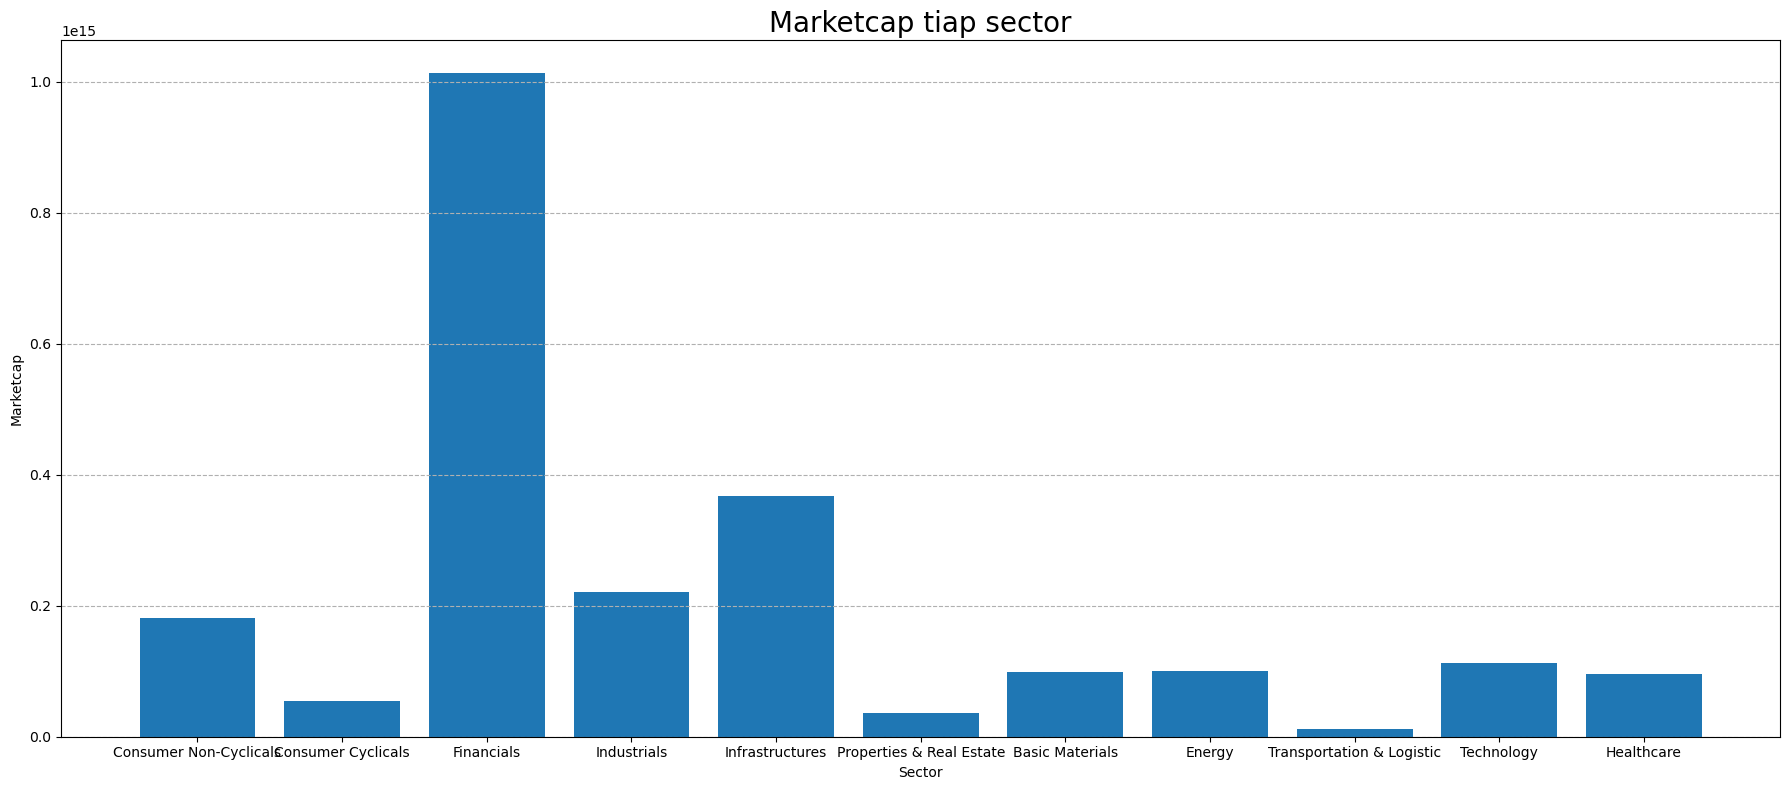

In [169]:
marketcap= dataset_dataframe['MarketCap']
sector = dataset_dataframe['Sector']
plt.figure(figsize=(18, 8))
plt.bar(sector, marketcap)

plt.title("Marketcap tiap sector", fontsize=20)
plt.xlabel("Sector")
plt.ylabel("Marketcap")

plt.grid(axis='y', alpha=1, linestyle= '--')
plt.tight_layout()
plt.show()

In [170]:
dataset_dataframe.columns

Index(['Code', 'Name', 'ListingDate', 'Shares', 'ListingBoard', 'Sector',
       'LastPrice', 'MarketCap', 'MinutesFirstAdded', 'MinutesLastUpdated',
       'HourlyFirstAdded', 'HourlyLastUpdated', 'DailyFirstAdded',
       'DailyLastUpdated'],
      dtype='object')

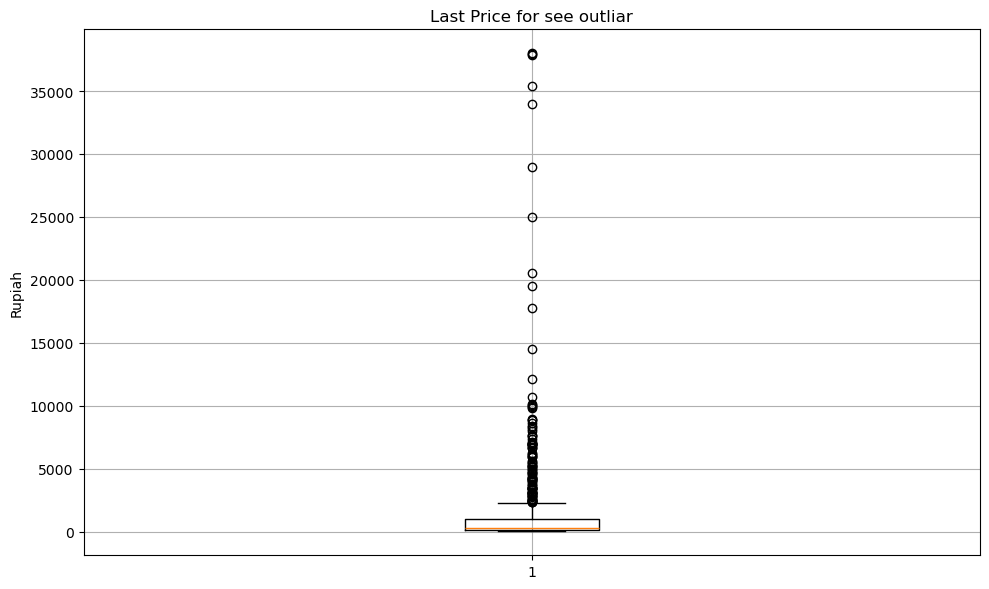

In [178]:
plt.figure(figsize=(10, 6))
plt.boxplot(dataset_dataframe['LastPrice'])
plt.title("Last Price for see outliar")
plt.ylabel("Rupiah")
plt.grid(alpha=1)
plt.tight_layout()
plt.show()
# titik hitam itu adalah outliar

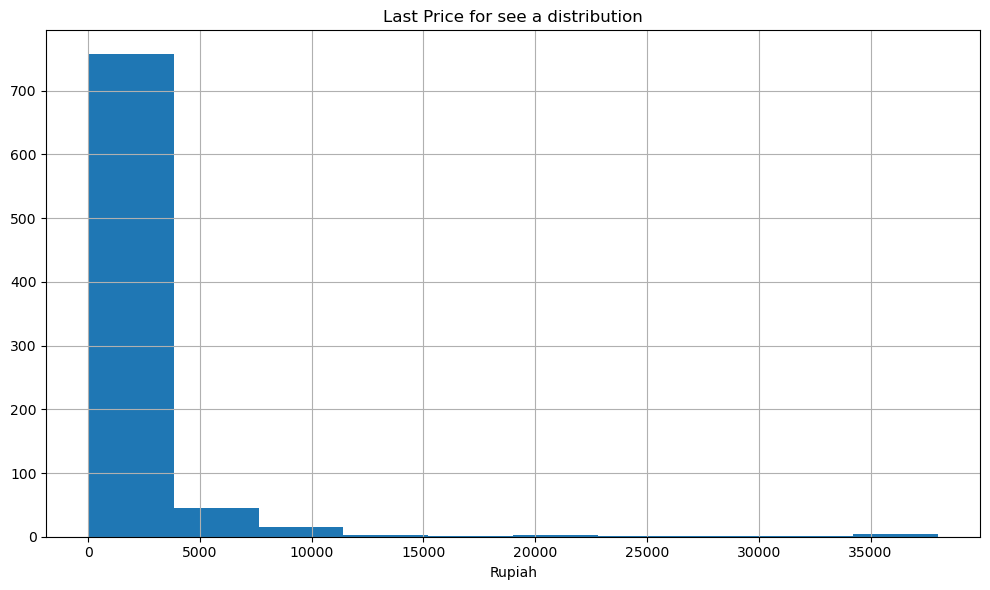

In [176]:
plt.figure(figsize=(10, 6))
plt.hist(dataset_dataframe['LastPrice'])
plt.title("Last Price for see a distribution")
plt.xlabel("Rupiah")
plt.grid(alpha=1)
plt.tight_layout()
plt.show()

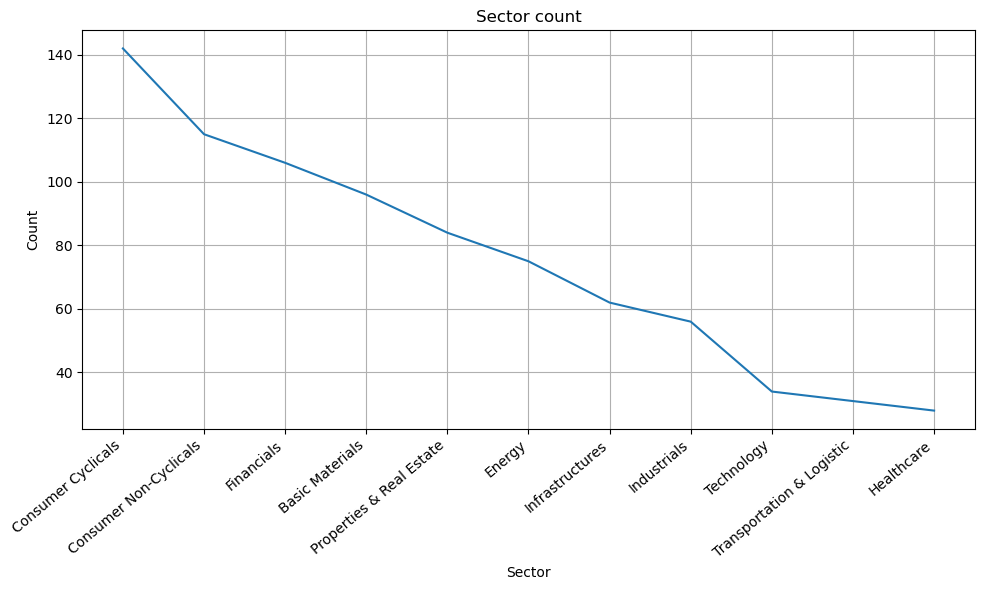

In [175]:
sector_counts = dataset_dataframe['Sector'].value_counts()
plt.figure(figsize=(10, 6))
plt.plot(sector_counts)
plt.title("Sector count")
plt.xlabel("Sector")
plt.xticks(rotation=40, ha='right')
plt.ylabel("Count")
plt.grid(alpha=1)
plt.tight_layout()
plt.show()